# 🐫 CAMEL VLM Agent

In [ ]:
# !pip install camel-ai[all]=="0.2.9"

In [ ]:
import os
from getpass import getpass

# Prompt for the API key securely
openai_api_key = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

Enter your API key: ··········


In [2]:
from camel.agents import ChatAgent
from camel.configs import ChatGPTConfig
from camel.messages import BaseMessage
from camel.types import ModelType, ModelPlatformType
from camel.types.enums import RoleType
from camel.models import ModelFactory


sys_msg = BaseMessage.make_assistant_message(
    role_name="Assistant",
    content="You're a helpful assistant",
)

# Set model
model=ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O,
    model_config_dict=ChatGPTConfig(temperature=0.6).as_dict(),
)

# Set agent
vlm_agent = ChatAgent(
    sys_msg,
    model=model
)

2024-12-09 07:37:52,106 - camel - INFO - Camel library logging has been configured.


OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [ ]:
from io import BytesIO

import requests
from PIL import Image

# URL of the image
url = "https://raw.githubusercontent.com/camel-ai/camel/master/misc/logo_light.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

user_msg = BaseMessage.make_user_message(
    role_name="User", content="""what's in the image?""", image_list=[img]
)

# Get response information
response = vlm_agent.step(user_msg)
print(response.msgs[0].content)

The image contains the logo for "CAMEL-AI," featuring a stylized purple camel next to the text "CAMEL-AI" in purple.


### Ollama: llava VLM Model

In [8]:
from camel.agents import ChatAgent
from camel.configs import ChatGPTConfig
from camel.messages import BaseMessage
from camel.types import ModelType, ModelPlatformType
from camel.types.enums import RoleType
from camel.models import ModelFactory


sys_msg = BaseMessage.make_assistant_message(
    role_name="Assistant",
    content="You're a helpful assistant",
)

# Set model
model=ModelFactory.create(
    model_platform=ModelPlatformType.OLLAMA,
    model_type='llava',
    url='http://localhost:11434/v1',
)

# Set agent
vlm_agent = ChatAgent(
    sys_msg,
    model=model
)

2024-12-09 07:51:40,438 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.


2024-12-09 07:51:46,399 - httpx - INFO - HTTP Request: POST http://localhost:11434/v1/chat/completions "HTTP/1.1 200 OK"
2024-12-09 07:51:46,406 - camel.agents.chat_agent - INFO - Model llava, index 0, processed these messages: [{'role': 'system', 'content': "You're a helpful assistant"}, {'role': 'user', 'content': [{'type': 'text', 'text': "what's in the image?"}, {'type': 'image_url', 'image_url': {'url': '', 'detail': 'auto'}}]}]
 The image you've provided appears to be a logo or branding for "Camel." It features the word "Camel" in a stylized font, with the letter 'C' being particularly large and prominent. The design is simple and modern, using a limited color palette that includes shades of gray and blue. 

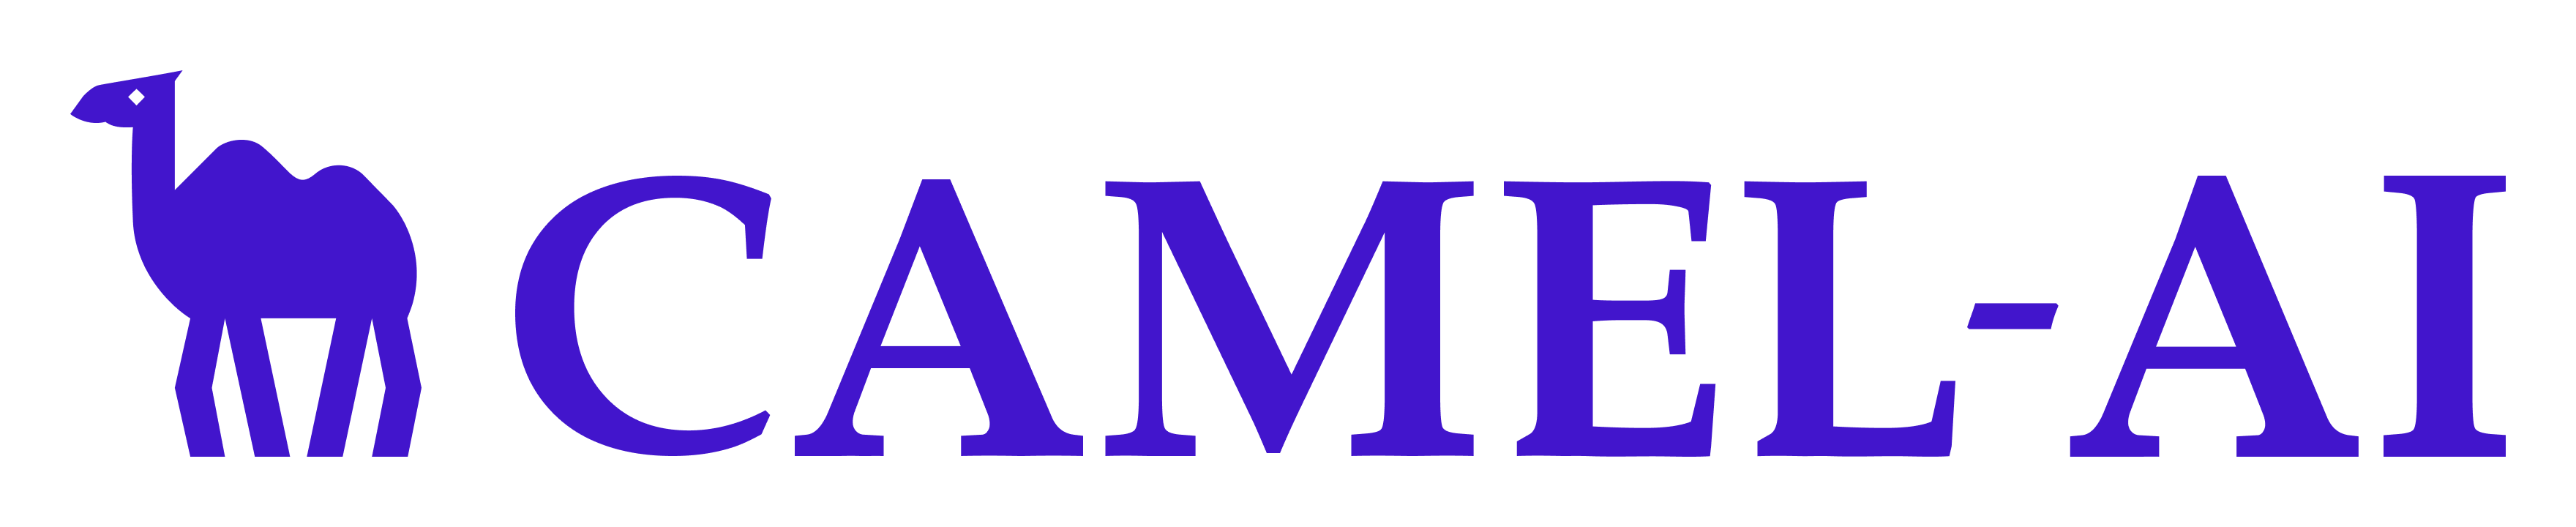

In [9]:
from io import BytesIO

import requests
from PIL import Image

# URL of the image
url = "https://raw.githubusercontent.com/camel-ai/camel/master/misc/logo_light.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

user_msg = BaseMessage.make_user_message(
    role_name="User", content="""what's in the image?""", image_list=[img]
)

# Get response information
response = vlm_agent.step(user_msg)
print(response.msgs[0].content)

In [18]:
prompt = f"""
    You are an expert in evaluating the performance of a player agent in Minecraft. 
    what's in the image?


"""

sys_msg = BaseMessage.make_assistant_message(
    role_name="Assistant",
    content=prompt,
)

print(sys_msg.to_openai_system_message())
vlm_agent = ChatAgent(
    sys_msg,
    model=model
)

{'role': 'system', 'content': "\n    You are an expert in evaluating the performance of a player agent in Minecraft. \n    what's in the image?\n\n\n"}
2024-12-09 07:58:39,444 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.


In [20]:
dict(sys_msg.to_openai_system_message())
sys_msg

BaseMessage(role_name='Assistant', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict=None, content="\n    You are an expert in evaluating the performance of a player agent in Minecraft. \n    what's in the image?\n\n\n", video_bytes=None, image_list=None, image_detail='auto', video_detail='low', parsed=None)

In [17]:
user_msg.to_openai_system_message()

{'role': 'system', 'content': "what's in the image?"}